## Project 3 - Image Classification

Team Members: Vamshi Gujjari, Hemant Koti <br>

This project focuses on training image data using Convolutional Neural Networks and it's architecture variants. <br> 
Part 1 of the notebook focuses on training a CNN on the Fashion MNIST dataset which consists of 60000 samples. <br>
Part 2 of the notebook focuses on data augmentation techniques to expand the size of the training data. <br>
Part 3 of the notebook uses CNN with 5 convolution layers to train and classify the ImageNet dataset.

**Note**: If the models can't be downloaded on UB Learns, kindly use this [link](https://drive.google.com/file/d/1fOMt9f-cSB-ByvagnMsMGp1ebG4Cv_7b/view?usp=sharing) to download them.


In [ ]:
import torch
import torchvision
from torch import Tensor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from torchvision.datasets import FashionMNIST
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout

### Part I: Fashion-MNIST Classification 


#### 1. Upload Fashion-MNIST dataset and prepare for training (normalize, split between train / test / validation).

In [ ]:
transform = transforms.Compose([ transforms.ToTensor()])

In [ ]:
train_set = torchvision.datasets.FashionMNIST("/drive/My Drive/Colab Notebooks", download=True, transform=transform)
test_set = torchvision.datasets.FashionMNIST("/drive/My Drive/Colab Notebooks", download=True, train=False, transform=transform)  

Extracting /drive/My Drive/Colab Notebooks/FashionMNIST/raw/train-images-idx3-ubyte.gz to /drive/My Drive/Colab Notebooks/FashionMNIST/raw


Extracting /drive/My Drive/Colab Notebooks/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /drive/My Drive/Colab Notebooks/FashionMNIST/raw



Extracting /drive/My Drive/Colab Notebooks/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /drive/My Drive/Colab Notebooks/FashionMNIST/raw


Extracting /drive/My Drive/Colab Notebooks/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /drive/My Drive/Colab Notebooks/FashionMNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [ ]:
train_set, valid_set = torch.utils.data.dataset.random_split(train_set, [int(0.8*len(train_set)), int(0.2*len(train_set))])

We started working with batch size 16 till 120, the model training was slow for smaller batch sizes and the model started giving good results for a batch size of 100.

In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, 
                                           batch_size=100)
valid_loader = torch.utils.data.DataLoader(valid_set,
                                           batch_size=100)
test_loader = torch.utils.data.DataLoader(test_set,
                                          batch_size=100)

In [ ]:
a = next(iter(train_loader))
a[0].size()

torch.Size([100, 1, 28, 28])

2


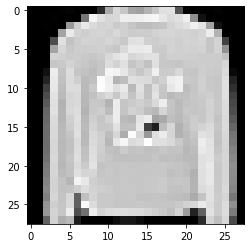

In [ ]:
image, label = next(iter(train_set))
plt.imshow(image.squeeze(), cmap="gray")
print(label)

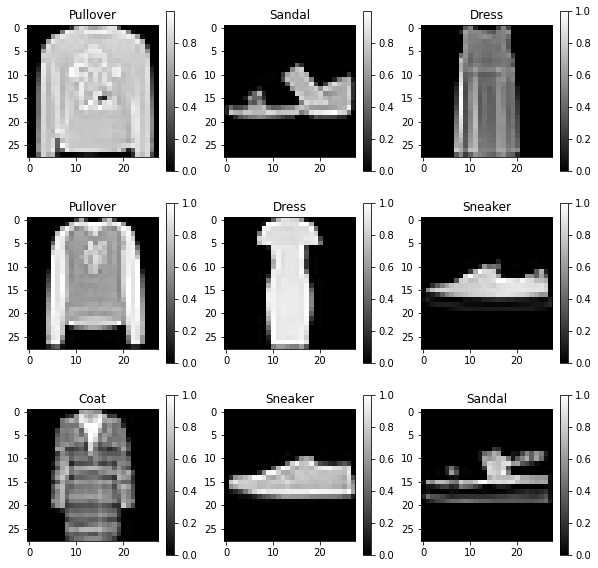

In [ ]:
## code snippet taken from https://www.kaggle.com/digvijayyadav/fmnist-nn-and-cnn

class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))

for i, (image, label)  in zip(range(9), train_set):
    plt.subplot(3, 3, i + 1)
    plt.grid(False)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.colorbar()
    label_index = int(label)
    plt.title(class_names[label_index])
plt.show()

#### 2. Build a ConvNet with at least 3 convolutional layers.

In [ ]:
class CNN_Model(Module):
    def __init__(self):
        super(CNN_Model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=1)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(kernel_size=2)
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.MaxPool2d(kernel_size=2)
        )
        self.fc1 = nn.Linear(7 * 7* 512, 1024)
        self.dropout = nn.Dropout2d(0.3)
        self.fc2 = nn.Linear(1024, 256)
        self.norm = nn.BatchNorm1d(256)
        self.fc3 = nn.Linear(256,10)
        

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.norm(x)
        return self.fc3(x)


In [ ]:
model = CNN_Model()

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
model = model.to(device)

In [ ]:
err = nn.CrossEntropyLoss()
lr = 0.001
optimizer = torch.optim.Adam(model.parameters(),lr=lr)
print(model)

CNN_Model(
  (layer1): Sequential(
    (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=25088, out_features=1024, bias=True)
  (dropout): Dropout2d(p=0.3, inplace=Fal

In [ ]:
epochs = 10
train_loss_vals = []
val_loss_vals = []
train_accuracy = []
accuracy = []
pred_list = []
labels_list = []
criterion = nn.CrossEntropyLoss()
train_total = 0
train_corr = 0
count = 0
running_loss = 0
for epoch in range(epochs):
    for images, labels in train_loader:
        # print("Labels: ", labels)
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        # print("outputs: ", outputs)
        train_pred = torch.max(outputs, 1)[1].to(device)
        train_total += len(labels)
        train_corr +=(train_pred == labels).sum()
        train_acc = (train_corr/(train_total*1.0))*100
        
        loss = criterion(outputs, labels)
        running_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        count+=1
        if(count%50 == 0):
            correct=0
            total=0
            train_loss_vals.append(running_loss/len(train_loader))
            train_accuracy.append(train_acc)
            model.eval()
            with torch.no_grad():
                for val_im, val_labels in valid_loader:
                    labels_list.append(val_labels)
                    val_im, val_labels = val_im.to(device), val_labels.to(device)
                    outputs = model(val_im)
                    val_loss = criterion(outputs, val_labels)
                    predictions = torch.max(outputs, 1)[1].to(device)
                    pred_list.append(predictions)
                    total += len(val_labels)
                    correct += (predictions == val_labels).sum()
                    acc = (correct/(total*1.0)) * 100
                # acc = (correct/(total*1.0)) * 100
            # loss_vals.append(loss.data)
            val_loss_vals.append(val_loss/len(valid_loader))
            accuracy.append(acc)
            running_loss = 0
            model.train()
        if count % 300 == 0:
            print('Iteration: {}   Training Loss: {}   Train Accuracy: {}   Validation Loss: {}   Validation Accuracy: {} %'.format(count, loss.data, train_acc.data ,val_loss.data, acc))
        

Iteration: 300   Training Loss: 0.24109715223312378   Train Accuracy: 84.97000122070312   Validation Loss: 0.24323047697544098   Validation Accuracy: 89.31666564941406 %
Iteration: 600   Training Loss: 0.12317876517772675   Train Accuracy: 86.99166870117188   Validation Loss: 0.19552230834960938   Validation Accuracy: 90.54166412353516 %
Iteration: 900   Training Loss: 0.19488434493541718   Train Accuracy: 88.54000091552734   Validation Loss: 0.1890621781349182   Validation Accuracy: 91.43333435058594 %
Iteration: 1200   Training Loss: 0.21400302648544312   Train Accuracy: 89.62166595458984   Validation Loss: 0.1892538070678711   Validation Accuracy: 91.60833740234375 %
Iteration: 1500   Training Loss: 0.058717288076877594   Train Accuracy: 90.4086685180664   Validation Loss: 0.19657906889915466   Validation Accuracy: 92.43333435058594 %
Iteration: 1800   Training Loss: 0.0636046901345253   Train Accuracy: 91.13945007324219   Validation Loss: 0.17115947604179382   Validation Accuracy: 

Saving the model after the training is completed, to preserve the weights of the fully trained model.

In [ ]:
torch.save(model.state_dict(), 'drive/My Drive/Colab Notebooks/fashion_mnist.pth')

Loading the model for predicting on the test data.

In [ ]:
model = CNN_Model()
model.load_state_dict(torch.load('drive/My Drive/Colab Notebooks/fashion_mnist.pth'))

<All keys matched successfully>

As shown below we got an overall accuracy of 92.3% on the testing data.

In [ ]:
labels = []
preds = []
correct = 0
total = 0
for image, label in test_loader:
    labels.append(label)
    image, label = image.to(device), label.to(device)
    op = model(image)
    pred = torch.max(op, 1)[1].to(device)
    total += len(label)
    correct +=(pred == label).sum()
    preds.append(pred)
test_accuracy = (correct/(total*1.0))*100

print("Test Accuracy: ", test_accuracy)

Test Accuracy:  tensor(92.3300, device='cuda:0')


#### 3. Discuss the results and provide the graphs, e.g. train vs validation accuracy and loss over time. Show the confusion matrix.

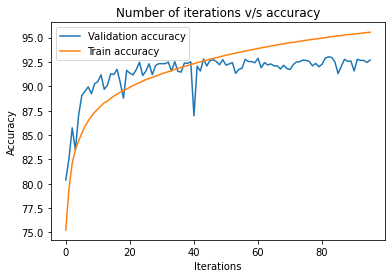

In [ ]:
plt.plot(accuracy, label="Validation accuracy")
plt.plot(train_accuracy, label="Train accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Number of iterations v/s accuracy")
plt.legend()
plt.show()

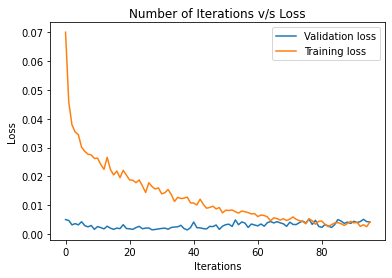

In [ ]:
plt.plot(val_loss_vals, label="Validation loss")
plt.plot(train_loss_vals, label="Training loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Number of Iterations v/s Loss")
plt.legend()
plt.show()

In [ ]:
pred_list = [pred_list[i].tolist() for i in range(len(pred_list))]
labels_list = [labels_list[i].tolist() for i in range(len(labels_list))]

In [ ]:
from itertools import chain 
pred_list = list(chain.from_iterable(pred_list))
labels_list = list(chain.from_iterable(labels_list))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred_list, labels_list)
print(cm)

[[ 99556     90   2188   2226    204      9  11929      1    382      1]
 [    44 105911     52    936    142      4     53      0     83      1]
 [  1877     66  99153    989   6067      2   6125      0    321      9]
 [  1749   1343   1072 107957   3507     13   2627      0    253      7]
 [   177    137   5137   2741 101417      1   5913      0    378     16]
 [    19     11     10      2     10 112968      1    808     84    578]
 [  9246    142   6265   3178   7482      8  90523      0    766     11]
 [    27      0      0      1      1   1165      0 110040     86   3423]
 [   486     12    171     48    114    167    429    113 116583     29]
 [     3      0      0      2      0   1151      0   3758      8 109205]]


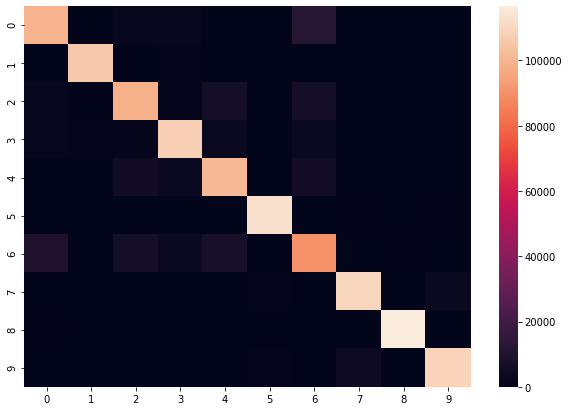

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, )


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(pred_list, labels_list))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87    116586
           1       0.98      0.99      0.99    107226
           2       0.87      0.87      0.87    114609
           3       0.91      0.91      0.91    118528
           4       0.85      0.87      0.86    115917
           5       0.98      0.99      0.98    114491
           6       0.77      0.77      0.77    117621
           7       0.96      0.96      0.96    114743
           8       0.98      0.99      0.98    118152
           9       0.96      0.96      0.96    114127

    accuracy                           0.91   1152000
   macro avg       0.92      0.92      0.92   1152000
weighted avg       0.91      0.91      0.91   1152000



### Part II: Data augmentation and CNN improvements

#### 1. Increase the dataset by x4 using any data augmentation techniques (rotations, shifting, mirroring, etc). You can use a combination of these techniques simultaneously.

Data augmentation techniques such as horizontal flipping, padding, and rotation are commonly applied to train large neural networks for better accuracy. <br>

Here we use four transformations - Random Horizontal Flipping, Random Rotation, Color Jitter, Random Affine. We experimented with transformations that include cropping and resizing the datasets which resulted in a lower model performance <br>

Hence we chose the tranformations that don't change the dataset drastically. 

The first transformation method is RandomHorizontalFlip - This technique horizontally flips the given image randomly with a given probability.

In [ ]:
from torchvision import transforms
transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5,],[0.5,])
])

train_set_1 = torchvision.datasets.FashionMNIST('/drive/My Drive/Colab Notebooks', train=True, download=True, transform=transforms)
test_set_1 = torchvision.datasets.FashionMNIST('/drive/My Drive/Colab Notebooks', train=False, download=True, transform=transforms)

The second transformation method is RandomRotation - This technique rotates the image by the givenangle.


In [ ]:
from torchvision import transforms
transforms = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.5,],[0.5,])
])

train_set_2 = torchvision.datasets.FashionMNIST('/drive/My Drive/Colab Notebooks', train=True, download=True, transform=transforms)
test_set_2 = torchvision.datasets.FashionMNIST('/drive/My Drive/Colab Notebooks', train=False, download=True, transform=transforms)

The third transformation method is ColorJitter - This technique changes the brightness, contrast and saturation of an image based on the parameters provided.



In [ ]:
from torchvision import transforms
transforms = transforms.Compose([
    transforms.ColorJitter(brightness=0.1, contrast=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.5,],[0.5,])
])

train_set_3 = torchvision.datasets.FashionMNIST('/drive/My Drive/Colab Notebooks', train=True, download=True, transform=transforms)
test_set_3 = torchvision.datasets.FashionMNIST('/drive/My Drive/Colab Notebooks', train=False, download=True, transform=transforms)

The fourth transformation method is ColorJitter - This technique applies an affine transformation of the image keeping center invariant.

In [ ]:
from torchvision import transforms
transforms = transforms.Compose([
    transforms.RandomAffine(degrees=10, translate=(0.1,0.1), scale=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize([0.5,],[0.5,])
])

train_set_4 = torchvision.datasets.FashionMNIST('/drive/My Drive/Colab Notebooks', train=True, download=True, transform=transforms)
test_set_4 = torchvision.datasets.FashionMNIST('/drive/My Drive/Colab Notebooks', train=False, download=True, transform=transforms)

In the final step we append all the transformations made on the dataset.

In [ ]:
train_set = torch.utils.data.ConcatDataset((train_set_1, train_set_2, train_set_3, train_set_4))
test_set = torch.utils.data.ConcatDataset((test_set_1, test_set_2, test_set_3, test_set_4))

In [ ]:
train_set, valid_set = torch.utils.data.dataset.random_split(train_set, [int(0.8*len(train_set)), int(0.2*len(train_set))])

We started working with batch size 16 till 120, the model training was slow for smaller batch sizes and the model started giving good results for a batch size of 100.

In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_set, batch_size=100)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=100)

Length of the datasets increased by 4 times.

In [ ]:
print(len(train_loader.dataset))

192000


In [ ]:
print(len(valid_loader.dataset))

48000


In [ ]:
print(len(test_loader.dataset))

40000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


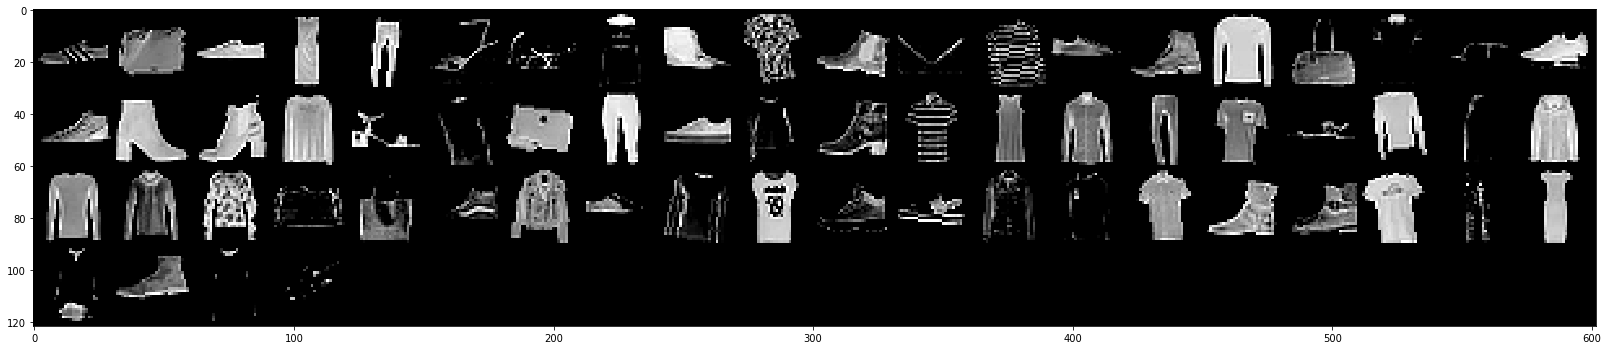

In [ ]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

grid = torchvision.utils.make_grid(images, nrow = 20, padding = 2)
plt.figure(figsize = (28, 28))  
plt.imshow(np.transpose(grid, (1, 2, 0)))   

In [ ]:
a = next(iter(train_loader))
a[0].size()

torch.Size([64, 1, 28, 28])

7


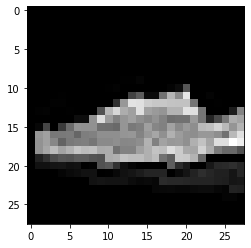

In [ ]:
image, label = next(iter(train_set))
plt.imshow(image.squeeze(), cmap="gray")
print(label)

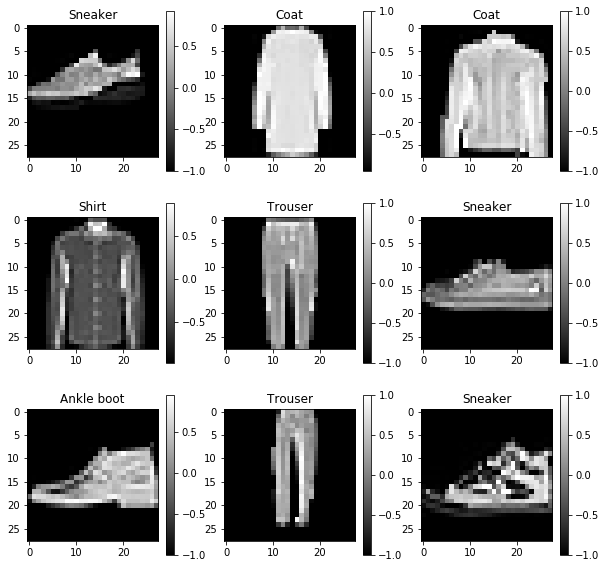

In [ ]:
## code snippet taken from https://www.kaggle.com/digvijayyadav/fmnist-nn-and-cnn

class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))

for i, (image, label)  in zip(range(9), train_set):
    plt.subplot(3, 3, i + 1)
    plt.grid(False)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.colorbar()
    label_index = int(label)
    plt.title(class_names[label_index])
plt.show()

#### 2. Apply tools that help to prevent overfitting (regularisers, dropouts, early stopping, etc). Discuss each of them and how they impact the testing performance.

In [ ]:
class CNN_Model(Module):
    def __init__(self):
        super(CNN_Model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=1)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(kernel_size=2)
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.MaxPool2d(kernel_size=2)
        )
        self.fc1 = nn.Linear(7 * 7* 512, 1024)
        self.dropout = nn.Dropout2d(0.3)
        self.fc2 = nn.Linear(1024, 256)
        self.norm = nn.BatchNorm1d(256)
        self.fc3 = nn.Linear(256,10)
        

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.norm(x)
        return self.fc3(x)

In [ ]:
torch.cuda.empty_cache()

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
model = CNN_Model().to(device)
# model = VGG_net().to(device)

In [ ]:
err = nn.CrossEntropyLoss()
lr = 0.001
optimizer = torch.optim.Adam(model.parameters(),lr=lr)
print(model)

CNN_Model(
  (layer1): Sequential(
    (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=25088, out_features=1024, bias=True)
  (dropout): Dropout2d(p=0.3, inplace=Fal

We built a 3 layered network same as the one used in part 1 of this notebook to compare the accuracy change when data augmentation techniques are applied.

In [ ]:
epochs = 15
train_loss_vals = []
val_loss_vals = []
train_accuracy = []
accuracy = []
pred_list = []
labels_list = []
criterion = nn.CrossEntropyLoss()
train_total = 0
train_corr = 0
count = 0
running_loss = 0

for epoch in range(epochs):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        train_pred = torch.max(outputs, 1)[1].to(device)
        train_total += len(labels)
        train_corr +=(train_pred == labels).sum()
        train_acc = (train_corr/(train_total*1.0))*100
        
        loss = criterion(outputs, labels)
        running_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        count+=1
        if(count%50 == 0):
            correct=0
            total=0
            train_loss_vals.append(running_loss/len(train_loader))
            train_accuracy.append(train_acc)
            model.eval()
            with torch.no_grad():
                for val_im, val_labels in valid_loader:
                    labels_list.append(val_labels)
                    val_im, val_labels = val_im.to(device), val_labels.to(device)
                    outputs = model(val_im)
                    val_loss = criterion(outputs, val_labels)
                    predictions = torch.max(outputs, 1)[1].to(device)
                    pred_list.append(predictions)
                    total += len(val_labels)
                    correct += (predictions == val_labels).sum()
                    acc = (correct/(total*1.0)) * 100
                    
            val_loss_vals.append(val_loss/len(valid_loader))
            accuracy.append(acc)
            running_loss = 0
            model.train()
            
        if count % 300 == 0:
            print('Iteration: {}   Training Loss: {}   Train Accuracy: {}   Validation Loss: {}   Validation Accuracy: {} %'.format(count, loss.data, train_acc.data ,val_loss.data, acc))
        

Iteration: 300   Training Loss: 0.45033693313598633   Train Accuracy: 78.58854675292969   Validation Loss: 0.37412789463996887   Validation Accuracy: 82.72083282470703 %
Iteration: 600   Training Loss: 0.2894779443740845   Train Accuracy: 82.171875   Validation Loss: 0.3587625026702881   Validation Accuracy: 87.46665954589844 %
Iteration: 900   Training Loss: 0.4287031888961792   Train Accuracy: 83.9982681274414   Validation Loss: 0.41386088728904724   Validation Accuracy: 86.6875 %
Iteration: 1200   Training Loss: 0.3757920563220978   Train Accuracy: 85.1953125   Validation Loss: 0.34264546632766724   Validation Accuracy: 89.73749542236328 %
Iteration: 1500   Training Loss: 0.4954330623149872   Train Accuracy: 86.13541412353516   Validation Loss: 0.9928545951843262   Validation Accuracy: 81.60416412353516 %
Iteration: 1800   Training Loss: 0.1252792775630951   Train Accuracy: 86.71180725097656   Validation Loss: 0.2712668478488922   Validation Accuracy: 90.06040954589844 %
Iteration: 

Saving the model after the training is completed, to preserve the weights of the fully trained model.

In [ ]:
torch.save(model.state_dict(), 'drive/My Drive/Colab Notebooks/fashion_mnist_augment.pth')

Loading the model for predicting on the test data.


In [ ]:
model = CNN_Model().to(device)
model.load_state_dict(torch.load('drive/My Drive/Colab Notebooks/fashion_mnist_augment.pth'))

<All keys matched successfully>

As shown below we got an overall accuracy of 93.8% on the testing data after performing data augmentation techniques. This is an improvement from the model in part 1.

In [ ]:
labels = []
preds = []
correct = 0
total = 0
for image, label in test_loader:
    labels.append(label)
    image, label = image.to(device), label.to(device)
    op = model(image)
    pred = torch.max(op, 1)[1].to(device)
    total += len(label)
    correct +=(pred == label).sum()
    preds.append(pred)
test_accuracy = (correct/(total*1.0))*100

print("Test Accuracy: ", test_accuracy)

Test Accuracy:  tensor(93.8650, device='cuda:0')


#### 3. Discuss the results and provide the graphs, e.g. train vs validation accuracy and loss over time. Show the confusion matrix.

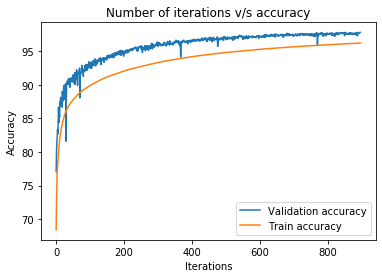

In [ ]:
plt.plot(accuracy, label="Validation accuracy")
plt.plot(train_accuracy, label="Train accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Number of iterations v/s accuracy")
plt.legend()
plt.show()

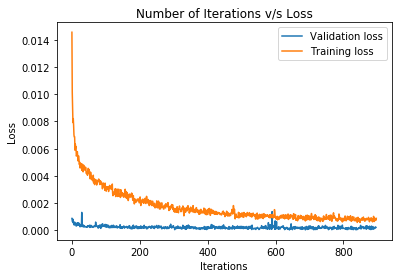

In [ ]:
plt.plot(val_loss_vals, label="Validation loss")
plt.plot(train_loss_vals, label="Training loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Number of Iterations v/s Loss")
plt.legend()
plt.show()

In [ ]:
pred_list = [pred_list[i].tolist() for i in range(len(pred_list))]
labels_list = [labels_list[i].tolist() for i in range(len(labels_list))]

In [ ]:
from itertools import chain 
pred_list = list(chain.from_iterable(pred_list))
labels_list = list(chain.from_iterable(labels_list))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred_list, labels_list)
print(cm)

[[4047314    1054   33360   30432    3143     217  233978      83    3431
      123]
 [    628 4265801     730    8788    2915     232    4766       4     881
      163]
 [  29469     740 4017132   11090   99848      67  136758      10    2726
       70]
 [  50066   22151   14919 4097775   58195     415   61104      11    3286
      673]
 [   3433    1481  101876   43589 4015556      10  117680      10    3585
      127]
 [    420     355     108     536      50 4283587     208   22298    2220
    11667]
 [ 178192    2109   98165   41366  122871      76 3783572       8    7500
      236]
 [    166       2       8      39      23   34186      21 4293192    1543
    88252]
 [   5989     447    1869    1085    2207    2870    5361     748 4299670
      807]
 [    120      71      52     213     141   12949     135   73876     758
  4171457]]


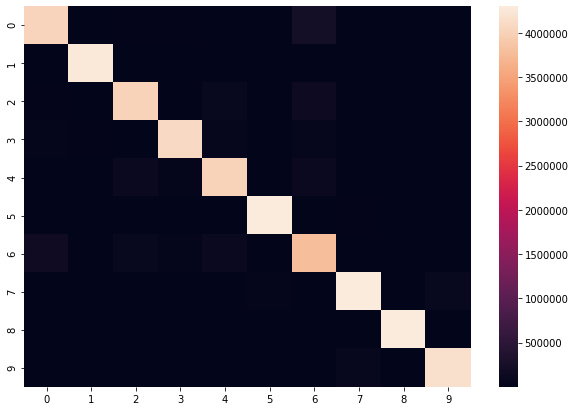

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, )

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(pred_list, labels_list))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93   4353135
           1       0.99      1.00      0.99   4284908
           2       0.94      0.93      0.94   4297910
           3       0.97      0.95      0.96   4308595
           4       0.93      0.94      0.93   4287347
           5       0.99      0.99      0.99   4321449
           6       0.87      0.89      0.88   4234095
           7       0.98      0.97      0.97   4417432
           8       0.99      1.00      0.99   4321053
           9       0.98      0.98      0.98   4259772

    accuracy                           0.96  43085696
   macro avg       0.96      0.96      0.96  43085696
weighted avg       0.96      0.96      0.96  43085696



### Part III: ImageNet Classification

#### 1. Choose at least 20 classes from ImageNet. Each class has to contain at least 500 images.

We downloaded the dataset from ImageNet site and pre-processed the data from the scripts provided in [github](https://github.com/skaldek/ImageNet-Datasets-Downloader)

#### 2. Download the dataset 


In [ ]:
!python drive/My\ Drive/Colab\ Notebooks/downloader.py -data_root drive/My\ Drive/Colab\ Notebooks/images

Picked the following clases: 
Count: 20
['cell', 'person', 'plant', 'food', 'pay-phone', 'motorcycling', 'computer', 'hawk', 'boa', 'kangaroo', 'cow', 'jellyfish', 'bear', 'camel', 'acropolis', 'alarm clock', 'aircraft', 'shield', 'bag', 'skeleton key']
Multiprocessing workers: 50
  0% 0/20 [00:00<?, ?it/s]
Scraping stats:
STATS For class is_flickr:
 tried 207.0 urls with 173.0 successes
83.57487922705315% success rate for is_flickr urls 
0.021298806791360668 seconds spent per is_flickr successful image download
STATS For class not_flickr:
 tried 0.0 urls with 0.0 successes
STATS For class all:
 tried 208.0 urls with 174.0 successes
83.65384615384616% success rate for all urls 
0.021201384478601915 seconds spent per all successful image download

Scraping stats:
STATS For class is_flickr:
 tried 458.0 urls with 384.0 successes
83.84279475982532% success rate for is_flickr urls 
0.018043759589393932 seconds spent per is_flickr successful image download
STATS For class not_flickr:
 tried

#### 3. Preprocess the dataset for training

In [ ]:
!python drive/My\ Drive/Colab\ Notebooks/image_net_preprocessing.py

List of folder names: ['cell', 'person', 'plant', 'food', 'pay-phone', 'motorcycling', 'computer', 'hawk', 'boa', 'kangaroo', 'cow', 'jellyfish', 'bear', 'camel', 'acropolis', 'alarm clock', 'aircraft', 'shield', 'bag', 'skeleton key']
Finished processing cell
Finished processing person
Finished processing plant
Finished processing food
Finished processing pay-phone
Finished processing motorcycling
Finished processing computer
Finished processing hawk
Finished processing boa
Finished processing kangaroo
Finished processing cow
Finished processing jellyfish
Finished processing bear
Finished processing camel
Finished processing acropolis
Finished processing alarm clock
Finished processing aircraft
Finished processing shield
Finished processing bag
Finished processing skeleton key
Runtime: 212.04420852661133s


In [ ]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

import torch
import torchvision
from torchvision.datasets import FashionMNIST
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout

#### 4. Build a CNN classifier with at least 3 convolutional layers to train on an ImageNet dataset that you have collected. 

In [ ]:
class CNN_Model(Module):
    def __init__(self):
        super(CNN_Model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        # self.layer2 = nn.Sequential(
        #     nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
        #     nn.BatchNorm2d(64),
        #     nn.ReLU()
        # )
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )
        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.layer6 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.layer7 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        # self.avgpool = nn.AdaptiveAvgPool2d(output_size=2)
        self.fc1 = nn.Linear(7 * 7* 512, 512)
        self.dropout1 = nn.Dropout2d(0.5)
        # self.fc2 = nn.Linear(512, 512)
        # self.dropout2 = nn.Dropout2d(0.5)
        self.fc3 = nn.Linear(512,20)

    def forward(self, x):
        x = self.layer1(x)
        # x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.layer6(x)
        x = self.layer7(x)
        # x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        # x = F.relu(self.fc2(x))
        # x = self.dropout2(x)
        return self.fc3(x)



In [ ]:
model = CNN_Model()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu" if torch.cuda.is_available() else "cpu")
model = model.to(device)
err = nn.CrossEntropyLoss()
lr = 0.001
optimizer = torch.optim.Adam(model.parameters(),lr=lr)
print(model)

CNN_Model(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer5): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer6): Sequential(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1):

We started working with 3 layered network used in the second part, but it gave poor results with accuracies around 30%. Then we started increasing the number of layers and neurons used in each layer and finally got 50% accuracy with the current model with 5 Convolution layers and one fully connected layer. The final model architecture is given above.

In [ ]:
## Snippet taken from https://github.com/utkuozbulak/pytorch-custom-dataset-examples

class CustomDatasetFromCsvLocation(Dataset):
    def __init__(self, csv_path, transform=None):
        """
        Custom dataset example for reading image locations and labels from csv
        but reading images from files
        Args:
            csv_path (string): path to csv file
        """
        # Transforms
        self.to_tensor = transforms.ToTensor()
        # Read the csv file
        self.data_info = pd.read_csv(csv_path)
        # First column contains the image paths
        self.image_arr = np.asarray(self.data_info.iloc[:, 1])#.reshape(28, 28).astype('uint8')
        # Second column is the labels
        self.label_arr = np.asarray(self.data_info.iloc[:, 2])
        self.data_len = len(self.data_info.index)
        self.transform = transform

    def __getitem__(self, index):
        single_image_name = self.image_arr[index]
        
        img_as_img = Image.open(single_image_name)
        

        img_as_tensor = self.to_tensor(img_as_img)
        if self.transform is not None:
            img_as_tensor = self.transform(img_as_img)
        single_image_label = self.label_arr[index]

        return (img_as_tensor, single_image_label)

    def __len__(self):
        return self.data_len

In [ ]:

transformations = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.ToTensor()])
train_dataset = CustomDatasetFromCsvLocation('drive/My Drive/Colab Notebooks/train_data_paths_and_labels.csv', transform=transformations)
test_dataset = CustomDatasetFromCsvLocation('drive/My Drive/Colab Notebooks/test_data_paths_and_labels.csv', transform=transformations)


In [ ]:
len(train_dataset)

8000

In [ ]:
len(test_dataset)

2000

In [ ]:
train_dataset, valid_dataset = torch.utils.data.dataset.random_split(train_dataset, [int(0.8*len(train_dataset)), int(0.2*len(train_dataset))])


We started working with batch size 16 till 120, the model training was slow for smaller batch sizes and the model started giving good results for a batch size of 100.

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                                batch_size=100)
valid_loader = torch.utils.data.DataLoader(valid_dataset,
                                           batch_size=100)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                                batch_size=100)

In [ ]:
a = next(iter(train_loader))
print(type(torch.Tensor(a[0])))
a[0].size()

<class 'torch.Tensor'>


torch.Size([100, 3, 224, 224])

hawk


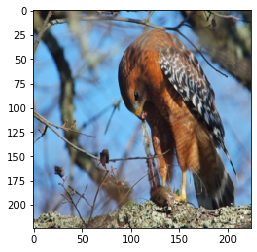

In [ ]:
image, label = next(iter(train_dataset))
npimg = image.numpy()
plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
print(label)

In [ ]:
image_labels = ['cell', 'person', 'plant', 'food', 'pay-phone', 
          'motorcycling', 'computer', 'hawk', 'boa', 'kangaroo', 
          'cow', 'jellyfish', 'bear', 'camel', 'acropolis', 'alarm clock', 
          'aircraft', 'shield', 'bag', 'skeleton key']



In [ ]:
def get_indexes(pred_labels):
    indices = []
    
    for i in pred_labels:

        if i in image_labels:
            indices.append(image_labels.index(i))
    return indices

In [ ]:
epochs = 100
train_loss_vals = []
val_loss_vals = []
train_accuracy = []
accuracy = []
pred_list = []
labels_list = []
criterion = nn.CrossEntropyLoss()
train_total = 0
train_corr = 0
count = 0
running_loss = 0
for epoch in range(epochs):
    for images, labels in train_loader:
        # images, labels = torch.Tensor(images).to(device), labels.to(device)
        images, labels = torch.Tensor(images).to(device), torch.tensor(get_indexes(labels), dtype=torch.long).to(device)
        # print("Taken images!!")
        optimizer.zero_grad()
        outputs = model(images)
        train_pred = torch.max(outputs, 1)[1].to(device)
        print("Iteration: ", count)
        train_total += len(labels)
        train_corr +=(train_pred == labels).sum()
        train_acc = (train_corr/(train_total*1.0))*100
        # print("labels: ", outputs)
        loss = criterion(outputs, labels)
        running_loss += loss
        loss.backward()
        optimizer.step()
        count+=1
        if(count%50 == 0):
            correct=0
            total=0
            train_loss_vals.append(running_loss/len(train_loader))
            train_accuracy.append(train_acc)
            model.eval()
            # print("There!!")
            with torch.no_grad():
                for val_im, val_labels in valid_loader:
                    labels_list.append(val_labels)
                    val_im, val_labels = val_im.to(device), torch.tensor(get_indexes(val_labels), dtype=torch.long).to(device)
                    outputs = model(val_im)
                    val_loss = criterion(outputs, val_labels)
                    predictions = torch.max(outputs, 1)[1].to(device)
                    pred_list.append(predictions)
                    total += len(val_labels)
                    # print("Validation in process!!!")
                    correct += (predictions == val_labels).sum()
                    acc = (correct/(total*1.0)) * 100
                acc = (correct/(total*1.0)) * 100
            
            val_loss_vals.append(val_loss/len(valid_loader))
            accuracy.append(acc)
            running_loss = 0
            model.train()
        if count % 300 == 0:
            print('Iteration: {}   Training Loss: {}   Train Accuracy: {}   Validation Loss: {}   Validation Accuracy: {} %'.format(count, loss.data, train_acc.data ,val_loss.data, acc))
            # print("Iteration: ", count)

Streaming output truncated to the last 5000 lines.
Iteration:  1418
Iteration:  1419
Iteration:  1420
Iteration:  1421
Iteration:  1422
Iteration:  1423
Iteration:  1424
Iteration:  1425
Iteration:  1426
Iteration:  1427
Iteration:  1428
Iteration:  1429
Iteration:  1430
Iteration:  1431
Iteration:  1432
Iteration:  1433
Iteration:  1434
Iteration:  1435
Iteration:  1436
Iteration:  1437
Iteration:  1438
Iteration:  1439
Iteration:  1440
Iteration:  1441
Iteration:  1442
Iteration:  1443
Iteration:  1444
Iteration:  1445
Iteration:  1446
Iteration:  1447
Iteration:  1448
Iteration:  1449
Iteration:  1450
Iteration:  1451
Iteration:  1452
Iteration:  1453
Iteration:  1454
Iteration:  1455
Iteration:  1456
Iteration:  1457
Iteration:  1458
Iteration:  1459
Iteration:  1460
Iteration:  1461
Iteration:  1462
Iteration:  1463
Iteration:  1464
Iteration:  1465
Iteration:  1466
Iteration:  1467
Iteration:  1468
Iteration:  1469
Iteration:  1470
Iteration:  1471
Iteration:  1472
Iteration:  14

Saving the model after the training is completed, to preserve the weights of the fully trained model.

In [ ]:
torch.save(model.state_dict(), 'drive/My Drive/Colab Notebooks/imagenet.pth')

#### 5. Discuss the results and provide the graphs, e.g. train vs validation accuracy and loss over time. Show the confusion matrix.

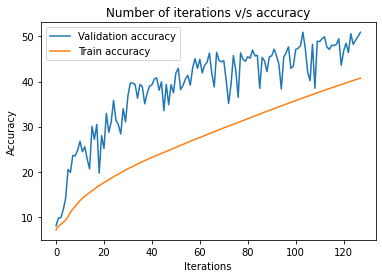

In [ ]:
plt.plot(accuracy, label="Validation accuracy")
plt.plot(train_accuracy, label="Train accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Number of iterations v/s accuracy")
plt.legend()
plt.show()

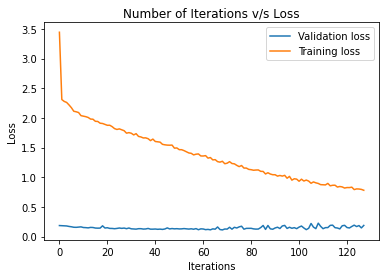

In [ ]:
plt.plot(val_loss_vals, label="Validation loss")
plt.plot(train_loss_vals, label="Training loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Number of Iterations v/s Loss")
plt.legend()
plt.show()

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


Loading the model for predicting on the test data

In [ ]:
model_2 = CNN_Model()
model_2.load_state_dict(torch.load('drive/My Drive/Colab Notebooks/imagenet.pth'))
model_2.to(device)
model_2.eval()

CNN_Model(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer4): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer5): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

As shown below we got an overall accuracy of 50.7% on the testing data.

In [ ]:
labels = []
preds = []
correct = 0
total = 0
i=0
with torch.no_grad():
  for image, label in test_loader:
      labels.append(label)
      image, label = image.to(device), torch.tensor(get_indexes(label), dtype=torch.long).to(device)
      i+=1
      op = model_2(image)
      pred = torch.max(op, 1)[1].to(device)
      total += len(label)
      correct +=(pred == label).sum()
      preds.append(pred)
test_accuracy = (correct/(total*1.0))*100

print("Test Accuracy: ", test_accuracy)

Test Accuracy:  tensor(50.7000, device='cuda:0')


In [ ]:
preds_list = [list(preds[i]) for i in range(len(preds))]
labels_list = [get_indexes(list(labels[i])) for i in range(len(labels))]

In [ ]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(preds_list, labels_list)
print(cm2)

[[61  6  7 11  0  1  2  2  2  0  0  9  1  1  0  8  0  3  5  1]
 [ 4 25  1  5  5  0 14  2  6  5  5  1  9  7  8 12  4 12  2  6]
 [ 6  3 64  8  0  0  0  3  2  1  1  3  6  0  0  0  0  5  2  0]
 [ 3  2  2 61  1  0  0  0  5  2  0  0  0  2  0  2  0  3  2  1]
 [ 1  6  0  1 60  3 16  1  0  0  0  0  0  1  3  5  5  4  1  4]
 [ 1  0  1  0  0 78  1  0  0  0  0  0  0  1  0  1  1  1  4  2]
 [ 0  3  0  0 11  0 30  0  0  0  0  0  0  1  0  5  4  4  6  3]
 [ 1  7  5  0  0  1  0 48 13 11  4  0 12  4  1  0  3  3  1  8]
 [ 3 13  3  5  0  0  5 17 47  6  0  0  5  4  0  2  0 11  3  8]
 [ 0  1  1  0  0  1  0  4  2 35  6  0  6  9  0  0  0  3  1  1]
 [ 0  1  1  0  0  0  1  1  0  2 66  0  4 11  0  0  0  0  0  1]
 [ 5  1  3  0  0  0  0  1  1  0  0 77  0  0  1  3  2  2  0  0]
 [ 2  5  3  0  1  0  0  7  4 12  7  4 49 13  1  1  0  3  0  0]
 [ 0  1  0  0  1  0  0  4  6 17  8  0  5 30 12  1  2  5  0  1]
 [ 0  0  0  0  4  0  0  1  1  1  3  0  0  7 69  0  1  1  0  1]
 [ 5  7  1  5  7  0 14  0  4  0  0  0  0  1  0 36  7  8

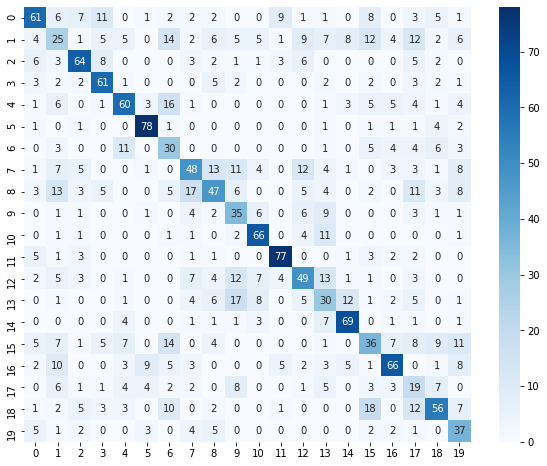

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(cm2, cmap='Blues', annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(preds_list, labels_list))

              precision    recall  f1-score   support

           0       0.61      0.51      0.55       120
           1       0.25      0.19      0.21       133
           2       0.64      0.62      0.63       104
           3       0.61      0.71      0.66        86
           4       0.60      0.54      0.57       111
           5       0.78      0.86      0.82        91
           6       0.30      0.45      0.36        67
           7       0.48      0.39      0.43       122
           8       0.47      0.36      0.41       132
           9       0.35      0.50      0.41        70
          10       0.66      0.75      0.70        88
          11       0.77      0.80      0.79        96
          12       0.49      0.44      0.46       112
          13       0.30      0.32      0.31        93
          14       0.69      0.78      0.73        89
          15       0.36      0.31      0.33       115
          16       0.66      0.54      0.59       123
          17       0.19    

### References

#### *Dataset*
1. [Fashion-MNIST](https://pytorch.org/docs/stable/torchvision/datasets.html#fashion-mnist)
2. [ImageNet](http://image-net.org/download)

#### *Code*
1. https://pytorch.org/docs/stable/nn.html#convolution-layers
2. https://www.analyticsvidhya.com/blog/2019/10/building-image-classification-models-cnn-pytorch/
3. https://towardsdatascience.com/start-your-cnn-journey-with-pytorch-in-python-6f8364a79801
4. https://adventuresinmachinelearning.com/pytorch-tutorial-deep-learning/
5. https://pytorch.org/docs/stable/torchvision/transforms.html
6. https://discuss.pytorch.org/t/how-to-resize-and-pad-in-a-torchvision-transforms-compose/71850


#### *Readings*
1. https://towardsdatascience.com/how-to-train-an-image-classifier-in-pytorch-and-use-it-to-perform-basic-inference-on-single-images-99465a1e9bf5
2.  https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf
3. https://discuss.pytorch.org/t/model-train-and-model-eval-vs-model-and-model-eval/5744/14
4. http://d2l.ai/chapter_convolutional-neural-networks/index.html
5. https://www.journaldev.com/36576/pytorch-dataloader
6. https://heartbeat.fritz.ai/basics-of-image-classification-with-pytorch-2f8973c51864
7. https://medium.com/secure-and-private-ai-writing-challenge/data-augmentation-increases-accuracy-of-your-model-but-how-aa1913468722
